**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 6**
Ingeniería de características (FE)

---

*   NOMBRES Y MATRÍCULAS

-Daniela Gómez Escamilla A01795312

-Francisco Antonio Enríquez Cabrera A01795006

-Juan Manuel Carballo Montaño A01166758

-Kurt Damián Yáñez Badelt A00394053

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# import os
# DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/Ciencia y Analítica de Datos/Semana 6/"
# os.chdir(DIR)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sys

In [6]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
%pip install category_encoders

DEPRECATION: Loading egg at c:\users\jmcar\anaconda3\lib\site-packages\rosmaster_lib-1.7.3-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [7]:
cars_df = pd.read_csv('../../datasets/vehicles.csv', error_bad_lines=False)
cars_df

C:\Users\jmcar\AppData\Local\Temp\ipykernel_21264\2408541496.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  cars_df = pd.read_csv('../../datasets/vehicles.csv', error_bad_lines=False)


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [8]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

# **Parte 1**. Preprocesamiento

1a)    Elimina las columnas que no serán relevantes para esta actividad: `id`, `VIN`, `url`, `image_url`, `description`, `posting_date`.


In [9]:
cars_df.drop(['id', 'VIN', 'url', 'image_url', 'description', 'posting_date'], axis=1, inplace=True)

1b) Almacena en una variable la cantidad de observaciones o registros del dataframe y en otra el número de columnas (después del borrado) para análisis posteriores.

In [10]:
rowsCars = cars_df.shape[0]
colsCars = cars_df.shape[1]

## Valores faltantes

Cuando la cantidad de valores faltantes en una columna es lo suficientemente grande (aproximadamente más del 25%), estimar e ingresar los valores faltantes no tiene sentido, y eliminar el atributo es mejor que estimar los valores faltantes. https://learning.oreilly.com/library/view/hands-on-data-preprocessing/9781801072137/B17397_11_Final_NM_ePub.xhtml#_idParaDest-188

Sin embargo, esto no es una regla aplicable a todos los escenarios y hay muchas discusiones en torno a ello. https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456/10

Para esta actividad  utilizaremos un umbral de 0.70 de la cantidad de registros (aquellas columnas que tengan 70% de valores no nulos). Considera además que estamos asumiendo que dichas variables son MCAR o MAR sin ninguna método gráfico o estadístico.

2a) Determina el porcentaje de valores faltantes por columna y elimina aquellas que posean el 30% o más de valores perdidos. Para ello utiliza el parámetro `thresh` de la función `dropna()` ¿Cuántas columnas se eliminaron?


In [11]:
print('Los porcentajes de valores faltantes para cada columna son:')
cars_df.isna().mean()*100

Los porcentajes de valores faltantes para cada columna son:


region            0.000000
region_url        0.000000
price             0.000000
year              0.282281
manufacturer      4.133714
model             1.236179
condition        40.785232
cylinders        41.622470
fuel              0.705819
odometer          1.030735
title_status      1.930753
transmission      0.598763
drive            30.586347
size             71.767476
type             21.752717
paint_color      30.501078
county          100.000000
state             0.000000
lat               1.534155
long              1.534155
dtype: float64

In [12]:
#Se eliminan las columnas con 30 % o más de valores perdidos
cars_df.dropna(axis = 1, thresh=rowsCars*0.70, inplace=True)

In [13]:
print('La cantidad de columnas eliminadas fue de {}.'.format(colsCars-cars_df.shape[1]))

La cantidad de columnas eliminadas fue de 6.


Además, cuando tenemos grandes conjuntos de datos, podemos eliminar filas que contienen valores nulos. Aunque, no se recomienda si el porcentaje de valores faltantes en el conjunto de datos es superior al 30%
https://medium.com/analytics-vidhya/how-to-deal-with-missing-values-in-data-set-8e8f70ecf155

2b) Borra los registros que contengan `NaN` en las columnas con menos del 5% de valores faltantes empleando el parámetro subset ¿Qué porcentaje de los registros iniciales se eliminaron?


In [14]:
#Se almacenan en un dataframe las columnas con más del 5 % de valores faltantes
columns95_df = cars_df.loc[:, cars_df.isnull().mean()*100 < 5]

In [15]:
#Se eliminan las columnas con más del 5 % de valores faltantes
cars_df.dropna(axis = 0, subset=columns95_df.columns, inplace=True)

In [16]:
print('El porcentaje de registros que se eliminó fue de {:.2f} %'.format((rowsCars-cars_df.shape[0])*100/rowsCars))

El porcentaje de registros que se eliminó fue de 10.16 %


2c) Si hay variables que aún poseen valores faltantes, utiliza el método de imputación apropiado (`mean, median, mode`)

In [17]:
cars_df.isna().mean()*100

region           0.000000
region_url       0.000000
price            0.000000
year             0.000000
manufacturer     0.000000
model            0.000000
fuel             0.000000
odometer         0.000000
title_status     0.000000
transmission     0.000000
type            21.485623
state            0.000000
lat              0.000000
long             0.000000
dtype: float64

In [18]:
#Se imputarán en price, year y odometer los valores faltantes con el más frecuente o la moda
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(cars_df.to_numpy())
cars = imp.transform(cars_df)

#Se actualiza el dataframe
cars_df = pd.DataFrame(cars, columns=cars_df.columns)
cars_df.type.unique()

c:\Users\jmcar\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


array(['pickup', 'truck', 'other', 'sedan', 'coupe', 'SUV', 'hatchback',
       'mini-van', 'offroad', 'van', 'convertible', 'wagon', 'bus'],
      dtype=object)

In [19]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383489 entries, 0 to 383488
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   region        383489 non-null  object
 1   region_url    383489 non-null  object
 2   price         383489 non-null  object
 3   year          383489 non-null  object
 4   manufacturer  383489 non-null  object
 5   model         383489 non-null  object
 6   fuel          383489 non-null  object
 7   odometer      383489 non-null  object
 8   title_status  383489 non-null  object
 9   transmission  383489 non-null  object
 10  type          383489 non-null  object
 11  state         383489 non-null  object
 12  lat           383489 non-null  object
 13  long          383489 non-null  object
dtypes: object(14)
memory usage: 41.0+ MB


In [ ]:
#Se vuelven a convertir a valores cuantitativos aquellos que originalmente lo eran
cars_df['price'] = pd.to_numeric(cars_df['price'], errors='coerce')
cars_df['year'] = pd.to_numeric(cars_df['year'], errors='coerce')
cars_df['odometer'] = pd.to_numeric(cars_df['odometer'], errors='coerce')
cars_df['lat'] = pd.to_numeric(cars_df['lat'], errors='coerce')
cars_df['long'] = pd.to_numeric(cars_df['long'], errors='coerce')

## Valores atípicos

3a) Obtén el histograma de las variables `price`, `year` y `odometer` para observar su distribución.

A continuación, se muestra el histograma de la variable price:


<Axes: >

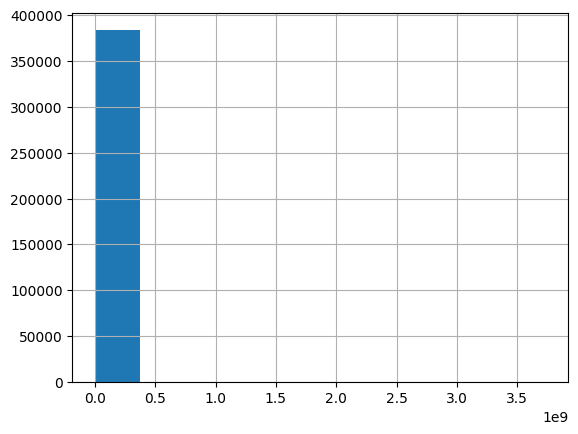

In [ ]:
print('A continuación, se muestra el histograma de la variable price:')
cars_df['price'].hist()

A continuación, se muestra el histograma de la variable year:


<Axes: >

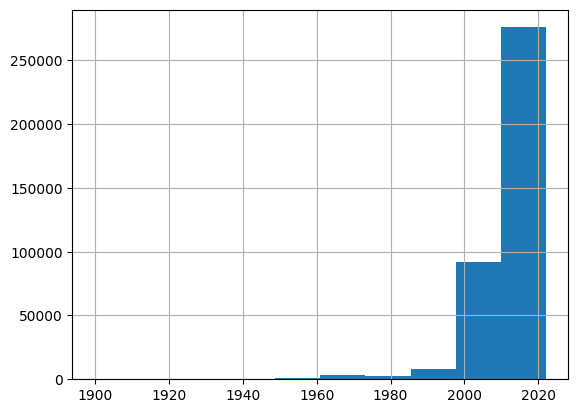

In [ ]:
print('A continuación, se muestra el histograma de la variable year:')
cars_df['year'].hist()

A continuación, se muestra el histograma de la variable odometer:


<Axes: >

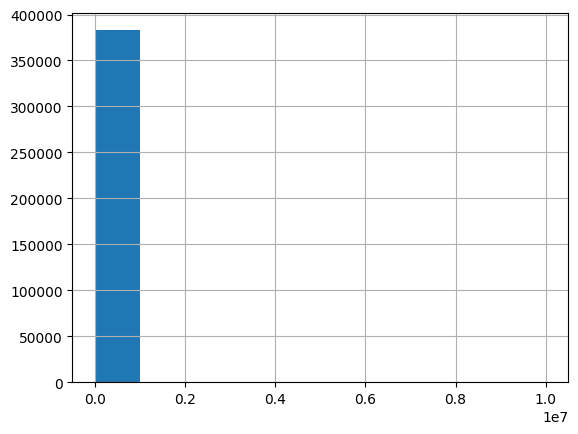

In [ ]:
print('A continuación, se muestra el histograma de la variable odometer:')
cars_df['odometer'].hist()

3b) Añade la columna `age`, calculada a partir de `year`, para determinar los años del vehículo y una vez obtenida, elimina la columna `year`. Genera el histograma de la nueva variable.

In [ ]:
#Se creará una columna llamada age a partir de restar a 2023 cada fecha registrada en la variable year
cars_df['age'] = 2023 - cars_df['year']

In [ ]:
print('A continuación, se muestran los valores de la variable age:')
cars_df['age']

A continuación, se muestran los valores de la variable age:


0          9.0
1         13.0
2          3.0
3          6.0
4         10.0
          ... 
383484     4.0
383485     3.0
383486     3.0
383487     5.0
383488     4.0
Name: age, Length: 383489, dtype: float64

A continuación, se muestran el histograma de la variable age:


<Axes: >

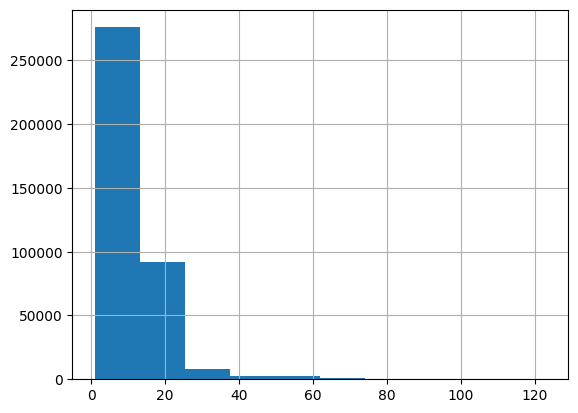

In [ ]:
print('A continuación, se muestran el histograma de la variable age:')
cars_df['age'].hist()

In [ ]:
#Se elimina la columna year
cars_df.drop('year', inplace=True, axis=1)

4a) Para visualizar si hay valores atípicos, genera gráficos de box plot para las tres variables (`price, age, odometer`)

A continuación, se muestran el histograma de la variable price


<Axes: xlabel='price'>

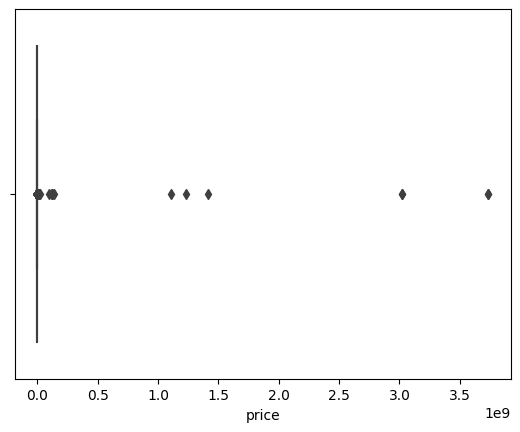

In [ ]:
print('A continuación, se muestran el histograma de la variable price')
sns.boxplot(cars_df, x='price')

A continuación, se muestran el histograma de la variable age


<Axes: xlabel='age'>

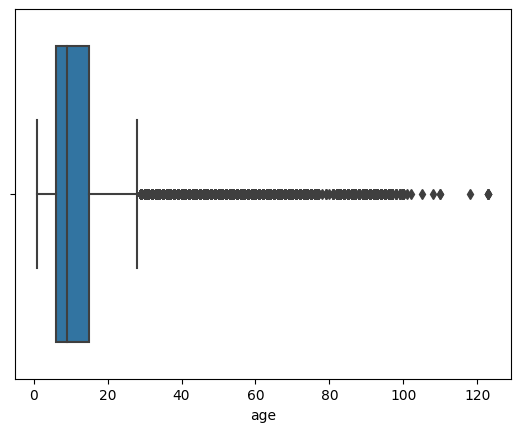

In [ ]:
print('A continuación, se muestran el histograma de la variable age')
sns.boxplot(cars_df, x='age')

A continuación, se muestran el histograma de la variable odometer


<Axes: xlabel='odometer'>

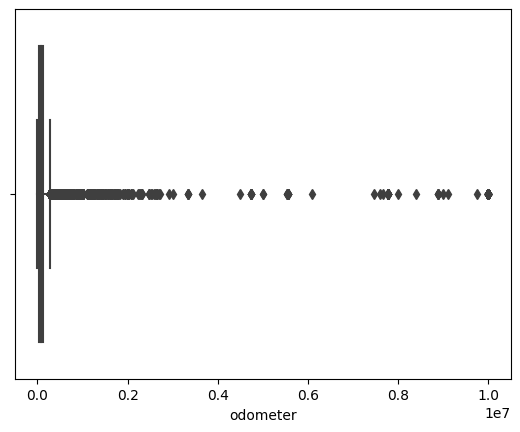

In [ ]:
print('A continuación, se muestran el histograma de la variable odometer')
sns.boxplot(cars_df, x='odometer')

Si el conjunto de outliers es “relativamente grande” (aunque sabemos que deben andar alrededor de un 5% del conjunto total de datos), realizar una investigación particular sobre ellos que permita tomar mejores decisiones.

In [ ]:
#Se crea una función para encontrar los valores atípicos de una columna en una dataframe
def outliers(df):
    p25 = df.quantile(0.25)
    p75 = df.quantile(0.75)
    iqr = p75 - p25
    upper_limit = p75 + 1.5 * iqr
    lower_limit = p25 - 1.5 * iqr

    return (df < lower_limit) | (df > upper_limit)

In [ ]:
print("La cantidad de valores atípicos en price es de {}.".format(cars_df[outliers(cars_df.price)].shape[0]))

La cantidad de valores atípicos en price es de 6285.


In [ ]:
print("La cantidad de valores atípicos en age es de {}.".format(cars_df[outliers(cars_df.age)].shape[0]))

La cantidad de valores atípicos en age es de 12023.


In [ ]:
print("La cantidad de valores atípicos en odometer es de {}.".format(cars_df[outliers(cars_df.odometer)].shape[0]))

La cantidad de valores atípicos en odometer es de 3118.


Con base en la cantidad de valores típicos **es posible posteriormente calcular el porcentaje con respecto al total y luego eliminarlos.**

4b) Calcula, para cada variable, el porcentaje de sus valores atípicos y elimínalos del dataframe ¿Qué porcentaje de los registros iniciales se eliminaron?

In [ ]:
#Se guarda la cantidad actual de registros del dataframe cars_df
rowsBeforeOutliers = cars_df.shape[0]

In [ ]:
#Se imprime el porcentaje de valores atípicos de price, odometer y age
for colName in ['price', 'odometer', 'age']:
  print('El porcentaje de valores atípicos de {} es de {:.3f}.'.format(colName,(cars_df[outliers(cars_df[colName])].shape[0] / cars_df.shape[0]) * 100))
  sys.stdout.flush()

El porcentaje de valores atípicos de price es de 1.639.
El porcentaje de valores atípicos de odometer es de 0.813.
El porcentaje de valores atípicos de age es de 3.135.


In [ ]:
#Se eliminan los valores atípicos de price, odometer y age
for colName in ['price', 'odometer', 'age']:
  cars_df.drop(cars_df[outliers(cars_df[colName])].index, inplace=True, axis=0)

In [ ]:
print('El porcentaje de registros que se eliminó fue de {:.2f} %'.format((rowsBeforeOutliers-cars_df.shape[0])*100/rowsBeforeOutliers))

El porcentaje de registros que se eliminó fue de 5.40 %


4c) Dibuja nuevamente los histogramas para observar claramente el sesgo de las variables tras la eliminación de los outliers.

A continuación, se muestran el histograma de la variable price


<Axes: >

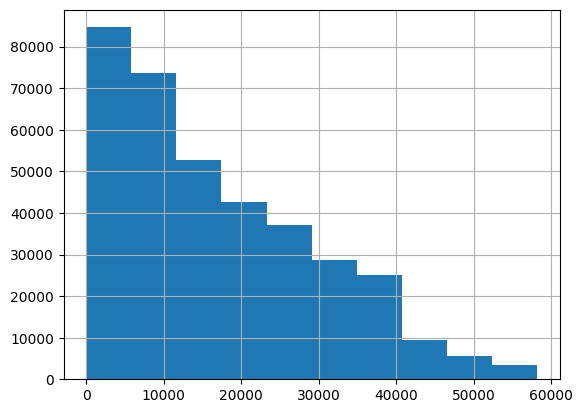

In [ ]:
print('A continuación, se muestran el histograma de la variable price')
cars_df['price'].hist()

A continuación, se muestran el histograma de la variable age


<Axes: >

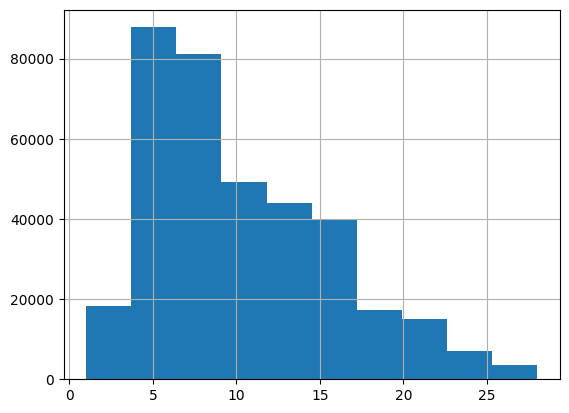

In [ ]:
print('A continuación, se muestran el histograma de la variable age')
cars_df['age'].hist()

A continuación, se muestran el histograma de la variable odometer


<Axes: >

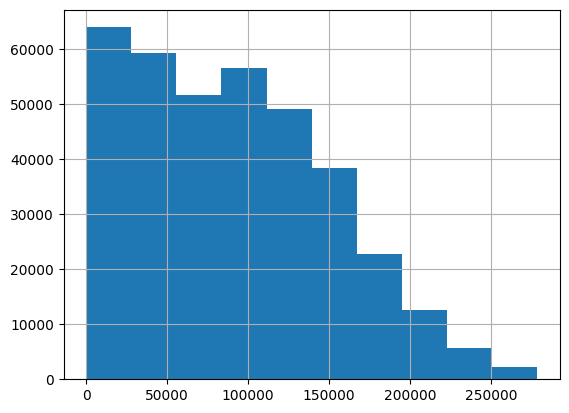

In [ ]:
print('A continuación, se muestran el histograma de la variable odometer')
cars_df['odometer'].hist()

Como se puede observar, las variables price, age y odometer poseen una **asimetría positiva, lo que indica un sesgo hacia la derecha en su distribución.**

# **Parte 2**. Ingeniería de características

## Transformando variables numéricas

La distribución de las variables determinará que método usar y en qué orden. Por ejemplo, en variables sesgadas se debe realizar primero la transformación  y luego el escalamiento, ya que el efecto deseado es "desinclinar" las distribuciones del eje y ese efecto se maximiza cuando aplica en el rango completo en comparación con aplicarlo en variables con una desviación estándar unitaria (por z-score) o variables en el rango [0,1] (por Min-Max).

Aplicar es escalamiento antes comprimiría la mayoría de los datos en un rango estrecho. Entonces se debe iniciar con transformar la característica en Gaussiana y luego escalarla.

5a) Genera gráficos Q-Q de las variables `price, age, odometer` para observar las diferencias entre sus distribuciones y la normal.


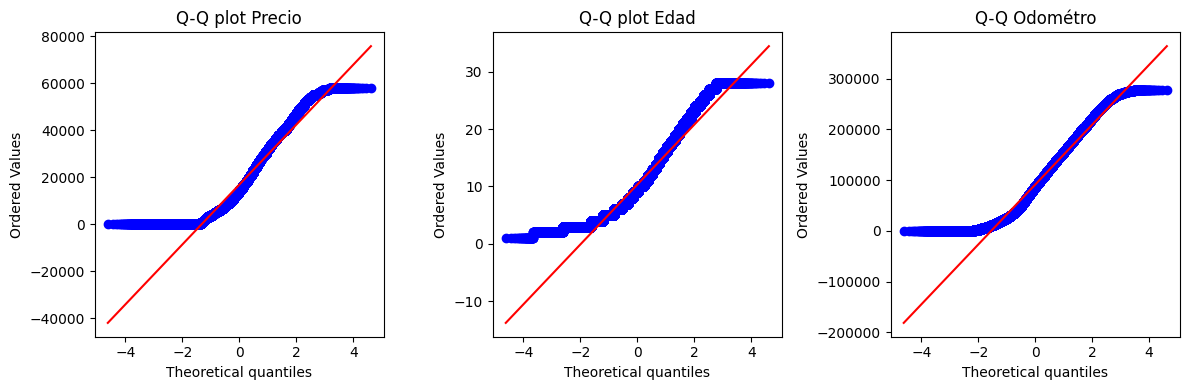

In [ ]:
#Se define el tamaño de los gráficos
plt.figure(figsize=(12, 4))

#Se define la posición del gráfico
plt.subplot(1, 3, 1)
#Se crea el gráfico Q-Q y se coloca su título
stats.probplot(cars_df['price'], dist="norm", plot=plt)
plt.title('Q-Q plot Precio')


plt.subplot(1, 3, 2)
stats.probplot(cars_df['age'], dist="norm", plot=plt)
plt.title('Q-Q plot Edad')


plt.subplot(1, 3, 3)
stats.probplot(cars_df['odometer'], dist="norm", plot=plt)
plt.title('Q-Q Odométro')

#Se ajusta el relleno entre las gráficas y se muestran
plt.tight_layout()
plt.show()

Las transformaciones *Box-Cox* y *Yeo-Johnson* son generalizaciones, pues incluyen casos especiales de transformaciones: logarítmica (`λ = 0`), recíproca (`λ = -1`),  raíz cuadrada (`λ = 0.5`) y más exponentes. En *Box-Cox* se evalúan varios valores de `λ` y se selecciona aquel que arroja la mejor transformación

La transformación de *Yeo-Johnson* es una extensión de la transformación de *Box-Cox* que ya no está restringida a valores positivos. En otras palabras, la transformación de *Yeo-Johnson* se puede utilizar en variables con valores cero y negativos, así como valores positivos. Cuando la variable solo tiene valores positivos, la transformación de *Yeo-Johnson* es como la transformación de *Box-Cox* de la variable más uno.

En este caso, como las variables `price` y `odometer` tienen valores de 0, utilizaremos *Yeo-Johnson*.

5b) Aplica la transformación Yeo-Johnson para reducir el sesgo en estas variables. Házlo en una copia del dataframe a la que denominarás `transf_df`.

In [ ]:
#Se crea una copia del dataFrame original y se almacena en trans_df
transf_df = cars_df.copy()

#Se crea el objeto PowerTransformer con el método Yeo-Johnson y se almacena en pow_trans
pow_trans = PowerTransformer(method='yeo-johnson', standardize=False)

#Se aplica la transformación en las variables price y odometer
for col in ['price', 'odometer']:
    transf_df[col] = pow_trans.fit_transform(transf_df[[col]])

5c) Dibuja nuevamente los gráficos Q-Q y los histogramas para observar el efecto de la transformación.

<Figure size 500x500 with 0 Axes>

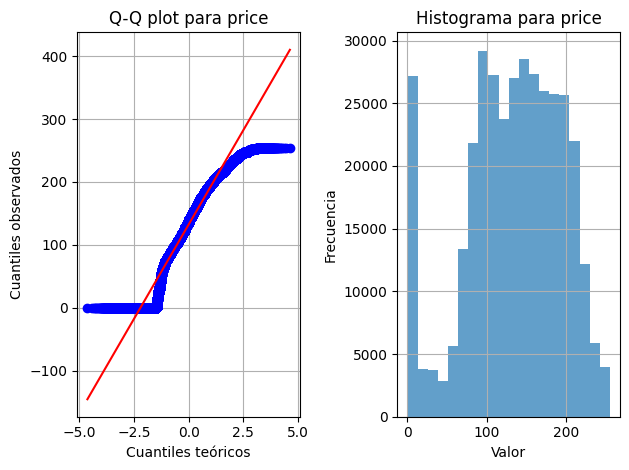

<Figure size 500x500 with 0 Axes>

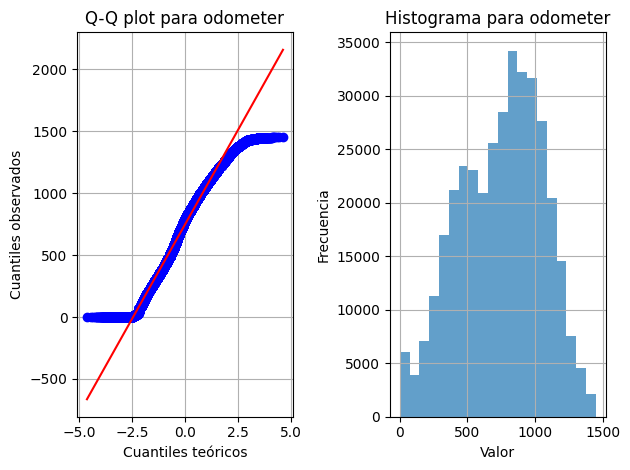

In [ ]:
#Para las variables price y odometer se creará un gráfico Q-Q y un histograma
for col in ['price', 'odometer']:
    plt.figure(figsize=(5, 5))
    _, (ax1, ax2) = plt.subplots(1, 2)

    #Se crea el gráfico Q-Q
    stats.probplot(transf_df[col], dist="norm", plot=ax1)
    ax1.set_title(f'Q-Q plot para {col}')
    ax1.set_xlabel('Cuantiles teóricos')
    ax1.set_ylabel('Cuantiles observados')
    ax1.grid(True)

    #Se crea el histograma
    ax2.hist(transf_df[col], bins=20, alpha=0.7)
    ax2.set_title(f'Histograma para {col}')
    ax2.set_xlabel('Valor')
    ax2.set_ylabel('Frecuencia')
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

## Escalando variables numéricas

6a) Como las tres variables poseen diferentes escalas, aplica el método Min-Max (al dataframe obtenido: `transf_df`) para que queden en el rango fijo [0 a 1]. Házlo en una copia del dataframe a la que denominarás `minmax_df`.


In [ ]:
#Se crea una copia del dataFrame original
minmax_df = transf_df

#Se crea el objeto MinMaxScaler
minmax_scaler = MinMaxScaler()

#Se aplica el objeto Min-Max scaling a las columnas price, age y odometer
minmax_df[['price','age','odometer']] = minmax_scaler.fit_transform(minmax_df[['price','age','odometer']])

In [ ]:
minmax_df

,region,region_url,price,manufacturer,model,fuel,odometer,title_status,transmission,type,state,lat,long,age
0,auburn,https://auburn.craigslist.org,0.788279,gmc,sierra 1500 crew cab slt,gas,0.434239,clean,other,pickup,al,32.590000,-85.480000,0.296296
1,auburn,https://auburn.craigslist.org,0.663623,chevrolet,silverado 1500,gas,0.484697,clean,other,pickup,al,32.590000,-85.480000,0.444444
2,auburn,https://auburn.craigslist.org,0.846457,chevrolet,silverado 1500 crew,gas,0.240991,clean,other,pickup,al,32.590000,-85.480000,0.074074
3,auburn,https://auburn.craigslist.org,0.761222,toyota,tundra double cab sr,gas,0.361921,clean,other,pickup,al,32.590000,-85.480000,0.185185
4,auburn,https://auburn.craigslist.org,0.555366,ford,f-150 xlt,gas,0.661793,clean,automatic,truck,al,32.592000,-85.518900,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383484,wyoming,https://wyoming.craigslist.org,0.676226,nissan,maxima s sedan 4d,gas,0.317882,clean,other,sedan,wy,33.786500,-84.445400,0.111111
383485,wyoming,https://wyoming.craigslist.org,0.756945,volvo,s60 t5 momentum sedan 4d,gas,0.188010,clean,other,sedan,wy,33.786500,-84.445400,0.074074
383486,wyoming,https://wyoming.craigslist.org,0.802354,cadillac,xt4 sport suv 4d,diesel,0.106726,clean,other,hatchback,wy,33.779214,-84.411811,0.074074
383487,wyoming,https://wyoming.craigslist.org,0.739512,lexus,es 350 sedan 4d,gas,0.306606,clean,other,sedan,wy,33.786500,-84.445400,0.148148


6b) Dibuja nuevamente los histogramas para verificar que el escalamiento no cambia la distribución.

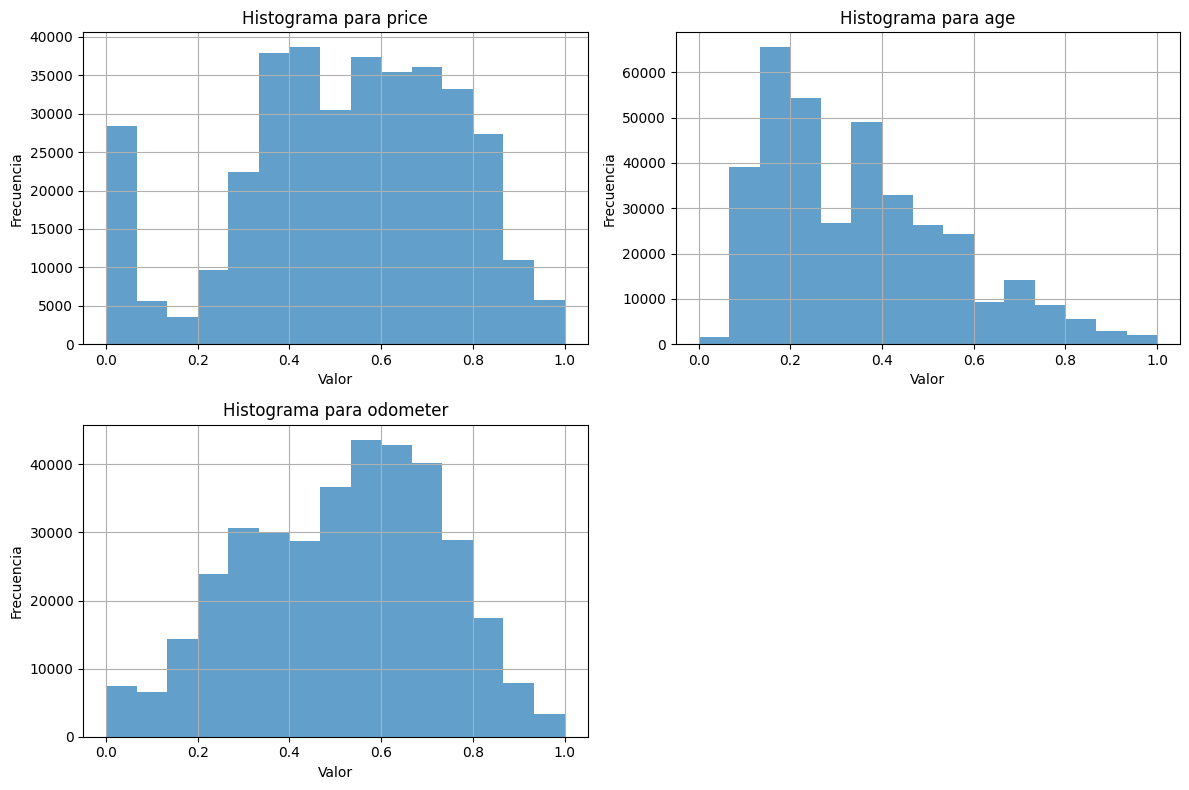

In [ ]:
#Se ajusta el tamaño de los gráficos
plt.figure(figsize=(12, 8))

#Se imprime el histograma de las variables price, age y odometer
for i, col in enumerate(['price', 'age', 'odometer']):
    plt.subplot(2, 2, i + 1)
    plt.hist(minmax_df[col], bins=15, alpha=0.7)
    plt.title(f'Histograma para {col}')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.grid(True)

plt.tight_layout()
plt.show()

Como se puede observar, **el escalamiento no cambia la distribución.**

## Codificando variables categóricas


7a) Utiliza el método `describe()` para obtener el resumen de las estadísticas descriptivas en las variables categóricas.

In [ ]:
print('A continuación, se muestran las estadísticas descriptivas de las variables categóricas')
cat_sum = minmax_df.describe(include='object').T
print(cat_sum)

A continuación, se muestran las estadísticas descriptivas de las variables categóricas
               count unique                                 top    freq
region        362777    404                            columbus    3015
region_url    362777    413  https://grandrapids.craigslist.org    2743
manufacturer  362777     40                                ford   61190
model         362777  19265                               f-150    7198
fuel          362777      5                                 gas  309295
title_status  362777      6                               clean  351115
transmission  362777      3                           automatic  288255
type          362777     13                               sedan  153769
state         362777     51                                  ca   42325


7b) Según la cardinalidad observada, separa en dos listas (`highly_cardinal_variables` y `few_cardinal_variables`) los nombres de las variables con alta cardinalidad y baja cardinalidad respectivamente.

In [ ]:
#Se calcula la cardinalidad de las variables categóricas
cardinalidades = minmax_df.select_dtypes(include='object').nunique()

#Se define umbral para la cardinalidad
umbral_cardinalidad = 100

#Se almacenan en diferentes variables las columnas según su cardinalidad
highly_cardinal_variables = list(cardinalidades[cardinalidades > umbral_cardinalidad].index)
few_cardinal_variables = list(cardinalidades[cardinalidades <= umbral_cardinalidad].index)

print("Variables con alta cardinalidad:", highly_cardinal_variables)
print("Variables con baja cardinalidad:", few_cardinal_variables)

Variables con alta cardinalidad: ['region', 'region_url', 'model']
Variables con baja cardinalidad: ['manufacturer', 'fuel', 'title_status', 'transmission', 'type', 'state']


7c) Visualiza en gráficos de barras la frecuencias de las categorías para las variables con baja cardinalidad (en `few_cardinal_variables`)

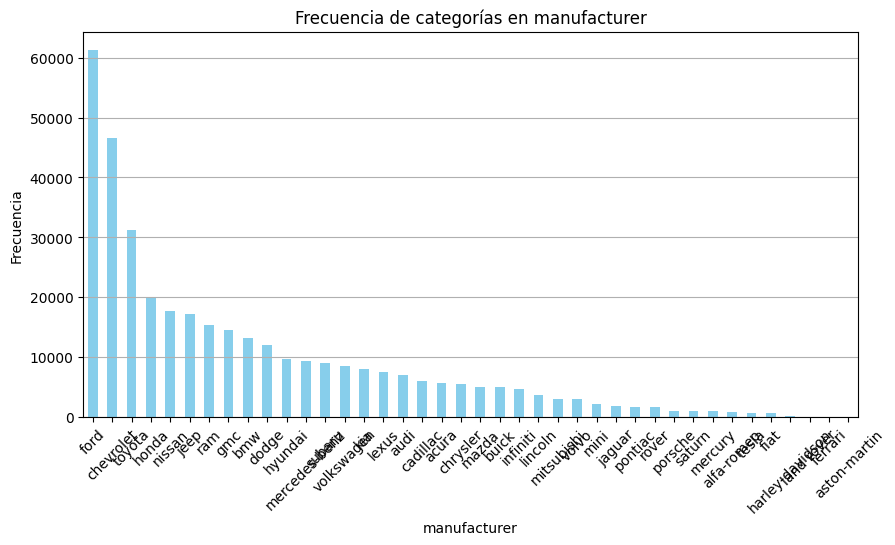

------------------------------------------------------------------------------------------------------------------------------------------------------


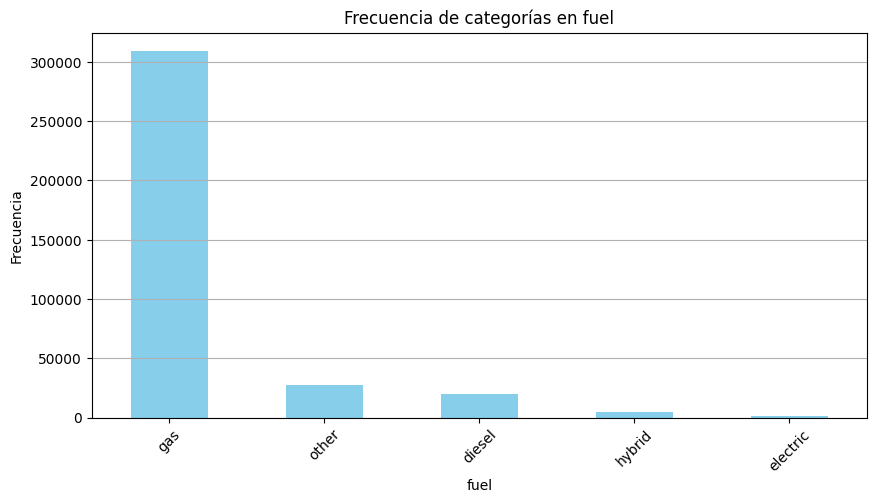

------------------------------------------------------------------------------------------------------------------------------------------------------


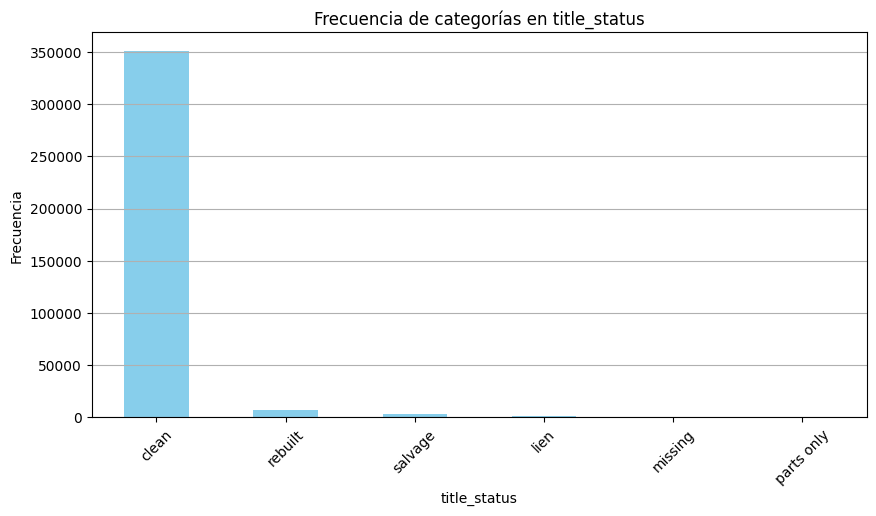

------------------------------------------------------------------------------------------------------------------------------------------------------


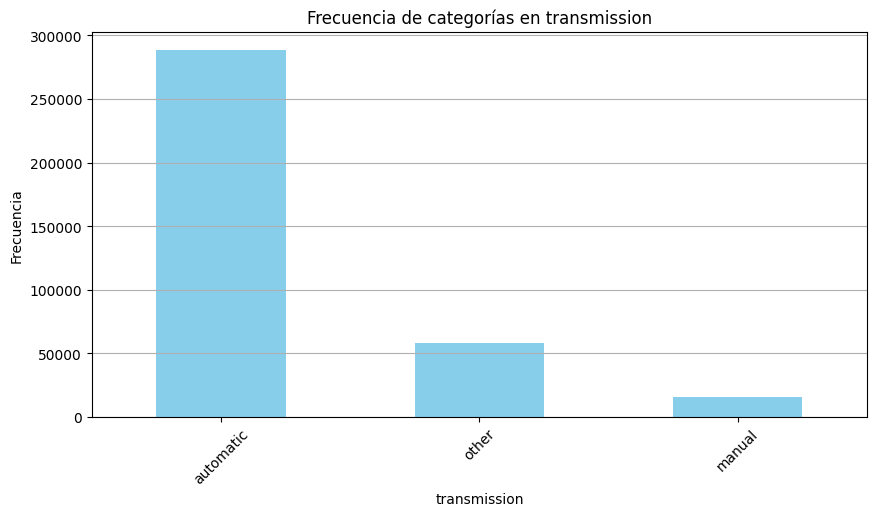

------------------------------------------------------------------------------------------------------------------------------------------------------


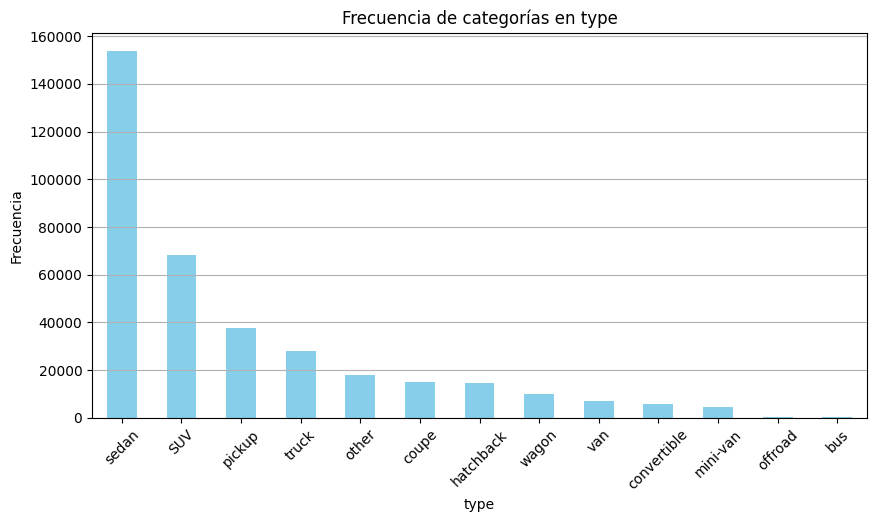

------------------------------------------------------------------------------------------------------------------------------------------------------


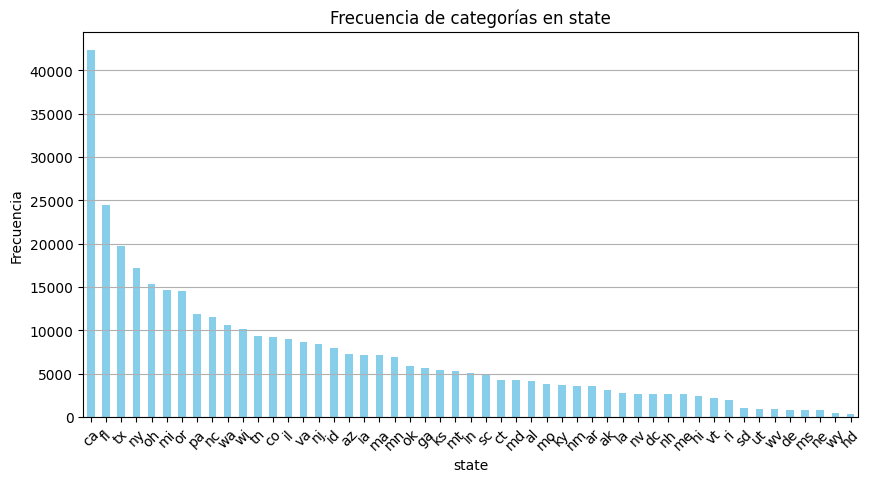

------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
#Se imprime con un ciclo un gráfico de barras para las frecuencias de cada categoría para variables con baja cardinalidad
for col in few_cardinal_variables:
    plt.figure(figsize=(10, 5))
    minmax_df[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Frecuencia de categorías en {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()
    print('-'*150)

8. Aplica codificación *one-hot* a las variables en `few_cardinal_variables`.


In [ ]:
#Se realiza una codificación one-hot con la función pd.get_dummies a las variables de baja cardinalidad
one_hot_encoded_df = pd.get_dummies(minmax_df[few_cardinal_variables], drop_first=True)
print('A continuación, se muestran los primeros 5 registros de las variables con baja cardinalidad después de aplicar una codificación one-hot:')
print(one_hot_encoded_df.head())

A continuación, se muestran los primeros 5 registros de las variables con baja cardinalidad después de aplicar una codificación one-hot:
   manufacturer_alfa-romeo  manufacturer_aston-martin  manufacturer_audi  \
0                        0                          0                  0   
1                        0                          0                  0   
2                        0                          0                  0   
3                        0                          0                  0   
4                        0                          0                  0   

   manufacturer_bmw  manufacturer_buick  manufacturer_cadillac  \
0                 0                   0                      0   
1                 0                   0                      0   
2                 0                   0                      0   
3                 0                   0                      0   
4                 0                   0                      0   

   manufa

9. Aplica codificación binaria a las variables en `highly_cardinal_variables`.

In [ ]:
import category_encoders as ce
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#encoder = ce.BinaryEncoder(cols=highly_cardinal_variables)
#cars_df_encoded = encoder.fit_transform(cars_df)
#print(cars_df_encoded.head())
from category_encoders.binary import BinaryEncoder
encoder = BinaryEncoder()
encoded_data = encoder.fit_transform(minmax_df[highly_cardinal_variables])
print(encoded_data.head())

   region_0  region_1  region_2  region_3  region_4  region_5  region_6  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   region_7  region_8  region_url_0  ...  model_5  model_6  model_7  model_8  \
0         0         1             0  ...        0        0        0        0   
1         0         1             0  ...        0        0        0        0   
2         0         1             0  ...        0        0        0        0   
3         0         1             0  ...        0        0        0        0   
4         0         1             0  ...        0        0        0        0   

   model_9  model_10  model_11  model_12  model_13  model_14  
0    

10. Concatena los dataframes obtenidos de las codificaciones anteriores al dataframe `minmax_df` (cuyas variables numéricas ya están transformadas) y elimina las columnas categóricas originales. Toma en cuenta que si los índices de los dataframes no coinciden, la concatenación no se realizará correctamente. Utiliza `reset_index(drop=True, inplace=True)` para restablecer los índices.

In [ ]:
#Se resetean los índices de cada dataframe
minmax_df.reset_index(drop=True, inplace=True)
one_hot_encoded_df.reset_index(drop=True, inplace=True)
encoded_data.reset_index(drop=True, inplace=True)

#Se concatenan los tres dataframe en final_df
final_df = pd.concat([minmax_df, one_hot_encoded_df, encoded_data], axis=1)

#Se obtienen las columnas categóricas originales de minmax_df y se eliminan de final_df
categorical_cols = minmax_df.select_dtypes(include=['object']).columns
final_df.drop(categorical_cols, axis=1, inplace=True, errors='ignore')

#Se imprime final_df
print(final_df)

           price  odometer        lat       long       age  \
0       0.788279  0.434239  32.590000 -85.480000  0.296296   
1       0.663623  0.484697  32.590000 -85.480000  0.444444   
2       0.846457  0.240991  32.590000 -85.480000  0.074074   
3       0.761222  0.361921  32.590000 -85.480000  0.185185   
4       0.555366  0.661793  32.592000 -85.518900  0.333333   
...          ...       ...        ...        ...       ...   
362772  0.676226  0.317882  33.786500 -84.445400  0.111111   
362773  0.756945  0.188010  33.786500 -84.445400  0.074074   
362774  0.802354  0.106726  33.779214 -84.411811  0.074074   
362775  0.739512  0.306606  33.786500 -84.445400  0.148148   
362776  0.756945  0.263874  33.779214 -84.411811  0.111111   

        manufacturer_alfa-romeo  manufacturer_aston-martin  manufacturer_audi  \
0                             0                          0                  0   
1                             0                          0                  0   
2           